Taller Python
Taller número 3
Cindy Lorena Umbacía Ramírez
Nicole Stephanie Mora Garcia



In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import random as rd 
import scipy as sc 
import folium 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
from mpl_toolkits import mplot3d
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.spatial.distance import cdist
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
from pandas.core.frame import DataFrame
from pickle import TRUE
## Punto 1 
rd.seed(1032494525)
Seqlat = np.arange(-73.30,-73.25,0.001)
Seqlong = np. arange(5.54, 5.58, 0.001)
Latitude = pd.DataFrame.sample(pd.DataFrame(Seqlat), 100, replace=TRUE)
Latitude = list(Latitude[0])
Longitude = pd.DataFrame.sample(pd.DataFrame(Seqlong), 100, replace= TRUE)
Longitude = list(Longitude[0])

## Dataframe 1
xy = pd.DataFrame({'Lat' : Latitude, 'Lon': Longitude})

##Dataframe 2 

SMI = np.partition(np.random.uniform(0.7,0.95,100), 10)
NDVI = np.partition(np.random.uniform(0.45,0.06,100), 10)
LST = np.partition(26* sc.stats.beta.rvs (0.87,0.91,size = 100), 10)

##
df1 = pd.DataFrame({'Lat': Latitude, 'Long': Longitude, 'SMI':SMI, 'NDVI':NDVI,'LST':LST})
df1["Posición"]=np.arange(len(df1))

<function matplotlib.pyplot.show>

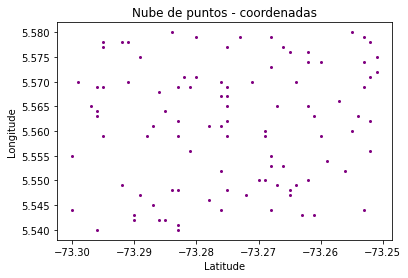

In [5]:
## Punto 2
import numpy as np
from matplotlib import pyplot as plt
plt.title('Nube de puntos - coordenadas')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.plot(Latitude,Longitude,'o',markersize=2,color= 'purple')
plt.show

Se puede observar la nube de puntos, teniendo en cuenta los valores de x=latitud y y=longitud. De esta misma menera se puede observar que hay dispersión en los datos.

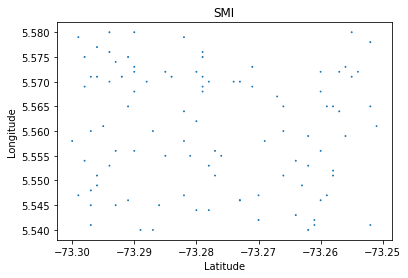

In [ ]:
##Punto 3 

from matplotlib import pyplot as plt

plt.title("SMI")
Grafico2= plt.scatter (Latitude, Longitude, s=SMI)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

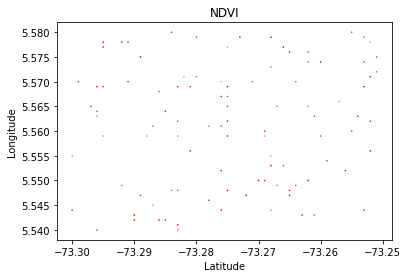

In [11]:
## Punto 4

plt.title("NDVI")
plt.scatter(Latitude, Longitude, color="red",s=NDVI)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

El gráfico presenta un cambio de los puntos a una tonalidad rojiza 

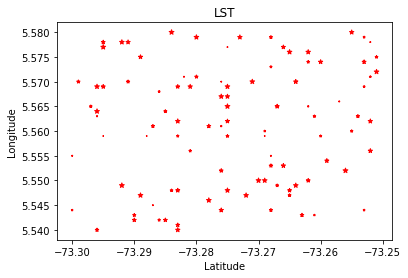

In [12]:
## Punto 5
plt.title("LST")
plt.scatter(Latitude, Longitude, marker="*", color="red",s=LST)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

Se observa el cambio de la forma de los puntos por estrellas de color rojo.

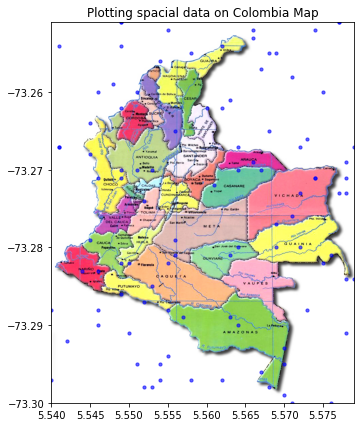

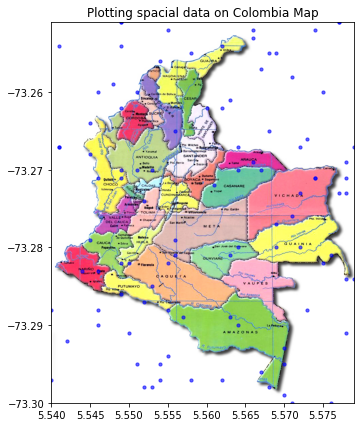

In [48]:
## Punto 6 Buscar alguna librería o programa(en última opción) que permita visualizar los puntos en el mapa de Colombia (¿están todos los puntos en Colombia? ¿pertenecen los puntos a alguna región específica de Colombia? ¿están todos los puntos dentro de esa región? Si alguno se sale de esa región (departamento), decartarlo y volver a graficar.
import numpy as np 
import matplotlib.pyplot as plt 
SM=(df1.Long.min(),df1.Long.max(),
    df1.Lat.min(),df1.Lat.max())
MP=plt.imread("/Mapa de Colombia (1).jpg")
fig,ax=plt.subplots(figsize=(8,7))
ax.scatter(df1.Long,df1.Lat,zorder=1,alpha=0.6,c="b",s=10)
ax.set_title("Plotting spacial data on Colombia Map")
ax.set_xlim(SM[0],SM[1])
ax.set_ylim(SM[2],SM[3])
ax.imshow(MP,zorder=0,extent=SM,aspect="equal")
# Borrando puntos 
mapa= folium.Map(location=[4.570868,-74.297333], zoom_start=6, control_scale= True)
for i in range(len(df1["Lat"])):
  folium.Marker(
      location=[df1["Long"][i],df1["Lat"][i]],
      popup=f'Long:{df1["Long"][i]},lat:{df1["Lat"][i]}',
      icon=folium.Icon()                                       
  ).add_to(mapa)
mapaSM=(df1.Long.min(),df1.Long.max(),
    df1.Lat.min(),df1.Lat.max())
MP=plt.imread("/Mapa de Colombia (1).jpg")
fig,ax=plt.subplots(figsize=(8,7))
ax.scatter(df1.Long,df1.Lat,zorder=1,alpha=0.6,c="b",s=10)
ax.set_title("Plotting spacial data on Colombia Map")
ax.set_xlim(SM[0],SM[1])
ax.set_ylim(SM[2],SM[3])
ax.imshow(MP,zorder=0,extent=SM,aspect="equal")
# Borrando puntos 
mapa= folium.Map(location=[4.570868,-74.297333], zoom_start=6, control_scale= True)
for i in range(len(df1["Lat"])):
  folium.Marker(
      location=[df1["Long"][i],df1["Lat"][i]],
      popup=f'Long:{df1["Long"][i]},lat:{df1["Lat"][i]}',
      icon=folium.Icon()                                       
  ).add_to(mapa)
mapa

Se observa el mapa de colombia con los puntos dentro de la región.

Text(0.5, 1.0, 'Boxplot de SMI')

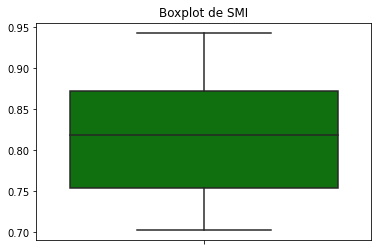

In [22]:
##Punto 7 Realice un boxplot para SMI

sns.boxplot(data=df1,y=SMI,color="green")
plt.title("Boxplot de SMI")

En boxplot  es de SMI, representa la media de SMI, correspondiendo a un valor cercano a 0.825 aproximadamente.

(array([14., 10.,  5., 15., 10.,  6.,  5.,  8., 12., 15.]),
 array([0.06266376, 0.09958826, 0.13651276, 0.17343727, 0.21036177,
        0.24728627, 0.28421077, 0.32113527, 0.35805977, 0.39498428,
        0.43190878]),
 <a list of 10 Patch objects>)

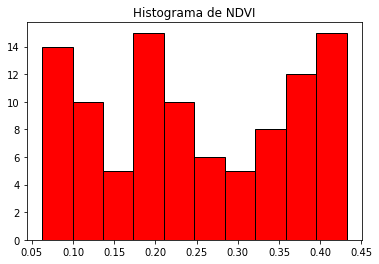

In [24]:
##Punto 8 Realice un histograma para NDVI
plt.title("Histograma de NDVI")
plt.hist(df1["NDVI"],color="red",ec="black")


El siguiente histograma corresponde al Indice NDVI, se observa que el valor mas bajo es 0.15 , sin embargo en 0.20 es el valor mas alto con un valor superior a 14.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


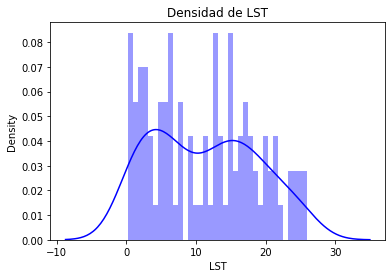

In [26]:
## Punto 9 Grafique la densidad para LST
plt.title("Densidad de LST")
sns.distplot(df1["LST"], hist=True,kde=True,bins=int(180/5),color="blue",)


Se observa el indice de densidad LST de color azúl

In [32]:

## Punto 10 Calcule estadísticas descriptivas para las 3 variables
from numpy.core.fromnumeric import mean
Media_SMI=mean(df1['SMI'])
print(Media_SMI)
Media_NDVI=mean(df1['NDVI'])
print(Media_NDVI)
Media_LST=mean(df1['LST'])
print(Media_LST)
# Varianzas
Var_SMI=df1['SMI'].var()
print(Var_SMI)
Var_NDVI=df1['NDVI'].var()
print(Var_NDVI)
Var_LST=df1['LST'].var()
print(Var_LST)
# Desviación estandar 
SD_SMI=df1["SMI"].std()
print(SD_SMI)
SD_NDVI=df1["NDVI"].std()
print(SD_NDVI)
SD_LST=df1["LST"].std()
print(SD_LST)
# Mediana
median_SMI = np.percentile(df1["SMI"], 50) 
print(median_SMI)
median_NDVI = np.percentile(df1["NDVI"], 50) 
print(median_NDVI)
median_LST = np.percentile(df1["LST"], 50) 
print(median_LST)

0.8164967140675191
0.2481023630707461
11.233394562772503
0.004791857877996015
0.014073804801424514
56.370915719832205
0.06922324665887909
0.11863306790867592
7.508056720605686
0.8186871642591975
0.22522897814551257
11.397409521705356


In [52]:
#### Punto 11 Fracciones los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante

Long_mean=np.mean(df1["Long"])
Lat_mean=np.mean(df1["Lat"])
Cuadrante=[]
for i in range(len(df1["Long"])):
  if df1["Long"][i]<Long_mean and df1["Lat"][i]<Lat_mean:
    Cuadrante.append("III")
  elif df1["Long"][i]>Long_mean and df1["Lat"][i]<Lat_mean:
    Cuadrante.append("II")
  elif df1["Long"][i]<Long_mean and df1["Lat"][i]>Lat_mean:
      Cuadrante.append("I")
  elif df1["Long"][i]>Long_mean and df1["Lat"][i]>Lat_mean:
      Cuadrante.append("IV")
  else:
    break
df3=pd.DataFrame({'Cuadrante':Cuadrante,
                    'Lat': Latitude, 
                    'Long': Longitude,
                    'SMI':SMI,
                    'NDVI':NDVI,
                    'LST':LST})
print(df3.head())

  Cuadrante     Lat   Long       SMI      NDVI       LST
0         I -73.254  5.541  0.710392  0.075942  0.240905
1        II -73.298  5.568  0.702233  0.069093  0.309119
2         I -73.270  5.549  0.719800  0.069754  0.845124
3        II -73.282  5.575  0.727082  0.062664  0.383441
4        IV -73.251  5.577  0.702959  0.075273  0.659974


In [54]:
# Calcule estadísticas descriptivas para los 4 cuadrantes 
# Medias
Media_C1=mean(df3.loc[df3["Cuadrante"]=="I"])
print(Media_C1)
Media_C2=mean(df3.loc[df3["Cuadrante"]=="II"])
print(Media_C2)
Media_C3=mean(df3.loc[df3["Cuadrante"]=="III"])
print(Media_C3)
Media_C4=mean(df3.loc[df3["Cuadrante"]=="IV"])
print(Media_C4)
# Varianzas
Var_C1=(df3.loc[df3["Cuadrante"]=="I"]).var
print(Var_C1)
Var_C2=(df3.loc[df3["Cuadrante"]=="II"]).var
print(Var_C2)
Var_C3=(df3.loc[df3["Cuadrante"]=="III"]).var
print(Var_C3)
Var_C4=(df3.loc[df3["Cuadrante"]=="IV"]).var
print(Var_C4)
# Desviación estandar 
SD_C1=(df3.loc[df3["Cuadrante"]=="I"]).std
print(SD_C1)
SD_C2=(df3.loc[df3["Cuadrante"]=="II"]).std()
print(SD_C2)
SD_C3=(df3.loc[df3["Cuadrante"]=="III"]).std()
print(SD_C3)
SD_C4=(df3.loc[df3["Cuadrante"]=="IV"]).std()
print(SD_C4)

Lat    -73.262304
Long     5.549435
SMI      0.817242
NDVI     0.231669
LST     12.234833
dtype: float64
Lat    -73.288227
Long     5.570364
SMI      0.823318
NDVI     0.236337
LST      9.404082
dtype: float64
Lat    -73.288692
Long     5.550308
SMI      0.807999
NDVI     0.257963
LST     11.538242
dtype: float64
Lat    -73.263276
Long     5.570414
SMI      0.818350
NDVI     0.261220
LST     11.553593
dtype: float64
<bound method NDFrame._add_numeric_operations.<locals>.var of    Cuadrante     Lat   Long       SMI      NDVI        LST
0          I -73.254  5.541  0.710392  0.075942   0.240905
2          I -73.270  5.549  0.719800  0.069754   0.845124
9          I -73.271  5.546  0.727461  0.085525   1.383309
15         I -73.259  5.548  0.857880  0.100993   2.269967
17         I -73.267  5.541  0.791367  0.110069   4.916801
25         I -73.264  5.545  0.835085  0.131349   8.073622
34         I -73.254  5.549  0.754352  0.193120   6.415715
36         I -73.271  5.549  0.756539  0.19343

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3370: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: Dropping of nuisance

Text(0.5, 1.0, 'Boxplot de SMI 2')

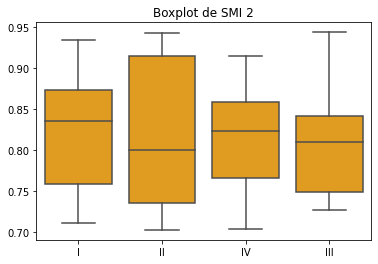

In [56]:
## Punto 12 Realice un boxplot para SMI que muestre las cajas de los 4 cuadrantes en el mismo gráfico
sns.boxplot(data=df3,x=Cuadrante,y=SMI,color="orange")
plt.title("Boxplot de SMI 2")

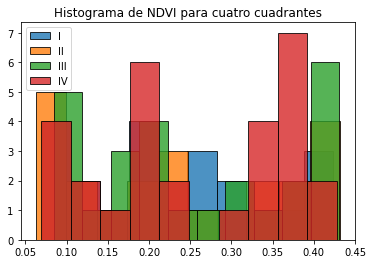

In [57]:
# P13 Realice un histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)
Serie1= (df3.loc[df3["Cuadrante"]=="I"])
Serie2= (df3.loc[df3["Cuadrante"]=="II"])
Serie3=(df3.loc[df3["Cuadrante"]=="III"])
Serie4=(df3.loc[df3["Cuadrante"]=="IV"])

plt.hist(Serie1['NDVI'],label="I",alpha=.8,edgecolor="black")
plt.hist(Serie2['NDVI'],label="II",alpha=.8,edgecolor="black")
plt.hist(Serie3['NDVI'],label="III",alpha=.8,edgecolor="black")
plt.hist(Serie4['NDVI'],label="IV",alpha=.8,edgecolor="black")

plt.title("Histograma de NDVI para cuatro cuadrantes")
plt.legend()
plt.show()

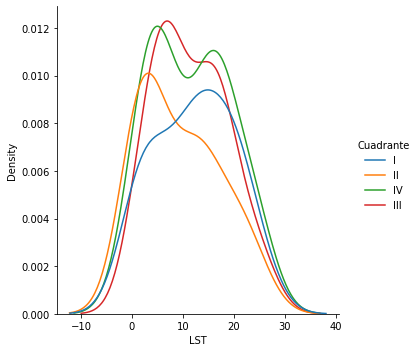

In [58]:
##P14 Realice un gráfico de densidades múltiple para LST que los muestre para los 4 cuadrantesen el mismo gráfico (superponiendo las densidades)

sns.displot(data=df3,x="LST",hue="Cuadrante",kind="kde")

In [59]:
## P15 Construya una matriz de correlaciones de Pearson para las 5 variables
Matriz_1=df3.corr()
Matriz_1

,Lat,Long,SMI,NDVI,LST
Lat,1.000000,0.050138,-0.012547,0.014495,0.055332
Long,0.050138,1.000000,0.033610,0.058147,-0.057868
SMI,-0.012547,0.033610,1.000000,0.459179,0.416701
NDVI,0.014495,0.058147,0.459179,1.000000,0.640154
LST,0.055332,-0.057868,0.416701,0.640154,1.000000


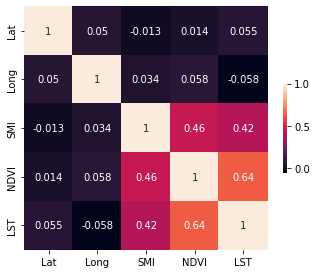

In [60]:
## P16 Realice un gráfico de correlaciones para las 5 variables
Matriz_1=df3.corr()
fig=plt.figure(figsize=[12,12])
ax1=fig.add_subplot(2,2,1)
sns.heatmap(Matriz_1, annot=True,ax=ax1,square=True,cbar_kws={"shrink":.3})

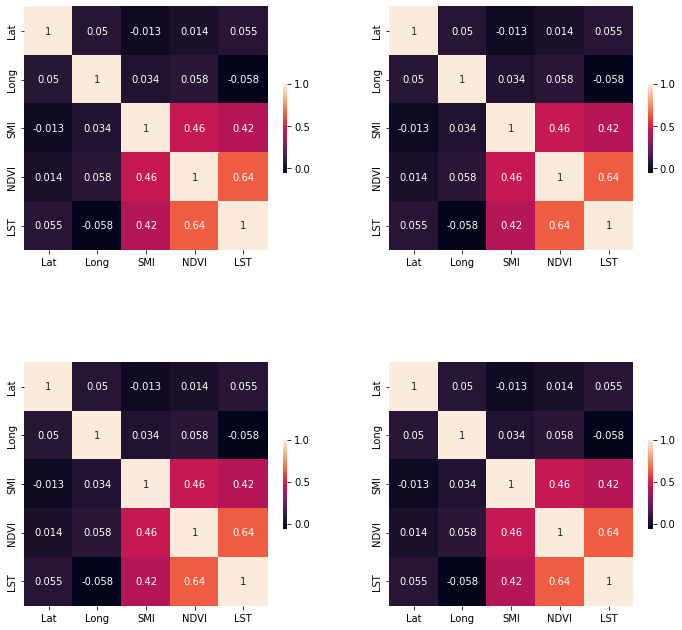

In [61]:
## P17 Fraccione el gráfico de correlaciones por cuadrante y muestre las 4 figuras en un solo gráfico

df4=df3.loc[df3["Cuadrante"]=="I"]
Matriz_4=df3.corr()
df5=df3.loc[df3["Cuadrante"]=="II"]
Matriz_5=df3.corr()
df6=df3.loc[df3["Cuadrante"]=="III"]
Matriz_6=df3.corr()
df7=df3.loc[df3["Cuadrante"]=="IV"]
Matriz_7=df3.corr()

fig=plt.figure(figsize=[12,12])
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.heatmap(Matriz_4, annot=True,ax=ax1,square=True,cbar_kws={"shrink":.3})
sns.heatmap(Matriz_5, annot=True,ax=ax2,square=True,cbar_kws={"shrink":.3})
sns.heatmap(Matriz_6, annot=True,ax=ax3,square=True,cbar_kws={"shrink":.3})
sns.heatmap(Matriz_7, annot=True,ax=ax4,square=True,cbar_kws={"shrink":.3})

In [62]:
## P18 Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST
y = df1['NDVI'] #variable dependiente 
x = df1['LST'] #Varible independiente
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary = lm.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     68.04
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           7.45e-13
Time:                        02:35:22   Log-Likelihood:                 98.145
No. Observations:                 100   AIC:                            -192.3
Df Residuals:                      98   BIC:                            -187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1345      0.017      8.129      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


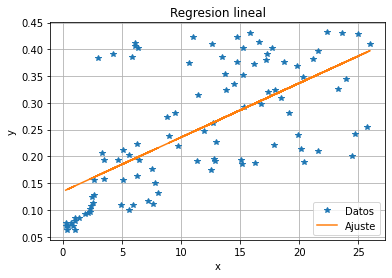

In [64]:
##P19 Ajuste un modelo de regresión multiple entre NDVI (respuesta) con LST y SMI
x = (LST)
y = (NDVI)
n = len(x)
x =np.array(x)
y = np.array(y)
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)
promx= sumx/n
promy= sumy/n
m=(sumx*sumy - n*sumxy)/(sumx**2 - n*sumx2)
b= promy - m*promx
plt.plot(x, y, '*', label= 'Datos')
plt.plot(x, m*x + b, label = 'Ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion lineal')
plt.grid()
plt.legend()
plt.show()

In [65]:
##P20 Tome una muestra del 80% del data.frame y calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos.
Multiple = smf.ols("NDVI ~ LST + SMI",df1)
result= Multiple.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NDVI   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     40.43
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.70e-13
Time:                        02:38:39   Log-Likelihood:                 102.09
No. Observations:                 100   AIC:                            -198.2
Df Residuals:                      97   BIC:                            -190.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1741      0.110     -1.576      0.118      -0.393       0.045
LST            0.0086      0.001      6.584      0.000       0.006       0.011
SMI            0.3991      0.141      2.823      0.006       0.119       0.680
==============================================================================
Omnibus:                        3.253   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.080
Skew:                           0.428   Prob(JB):                        0.214
Kurtosis:                       2.923   Cond. No.                         274.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
muestra_xy = df1.sample(80)
muestra_xy.corr()
mc= muestra_xy.corr()
mc.style.background_gradient (cmap = 'coolwarm')
print(muestra_xy)

       Lat   Long       SMI      NDVI        LST  Posición
81 -73.271  5.574  0.845226  0.248078  11.910549        81
30 -73.273  5.578  0.734511  0.202228   5.635065        30
50 -73.261  5.563  0.809131  0.186199  15.190096        50
79 -73.267  5.541  0.759228  0.175201  12.531349        79
86 -73.257  5.567  0.823433  0.427996  24.991958        86
..     ...    ...       ...       ...        ...       ...
4  -73.251  5.577  0.702959  0.075273   0.659974         4
47 -73.270  5.551  0.770074  0.325163  23.282965        47
12 -73.276  5.571  0.729228  0.095472   2.262283        12
64 -73.265  5.556  0.903319  0.254736  25.724820        64
28 -73.297  5.558  0.764667  0.163444   6.256073        28

[80 rows x 6 columns]


In [68]:
muestra_xy.corr()
mc= muestra_xy.corr()
mc.style.background_gradient (cmap = 'coolwarm')

,Lat,Long,SMI,NDVI,LST,Posición
Lat,1.000000,0.105351,-0.033770,0.057593,0.072290,0.007010
Long,0.105351,1.000000,0.035479,0.011975,-0.107118,-0.133299
SMI,-0.033770,0.035479,1.000000,0.546023,0.500998,0.520839
NDVI,0.057593,0.011975,0.546023,1.000000,0.684003,0.717586
LST,0.072290,-0.107118,0.500998,0.684003,1.000000,0.787838
Posición,0.007010,-0.133299,0.520839,0.717586,0.787838,1.000000


Text(0.5, 0, 'LST')

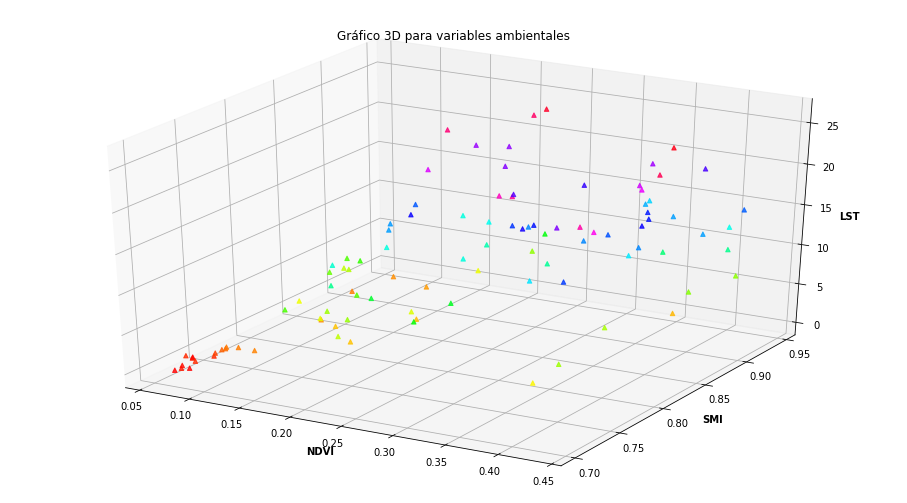

In [70]:
# P21 Haga un gráfico 3D para las 3 variables ambientales
z = df1.LST
x = df1.NDVI
y = df1.SMI
 
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='red',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

my_cmap = plt.get_cmap('hsv')
 
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("Gráfico 3D para variables ambientales")
ax.set_xlabel('NDVI', fontweight ='bold')
ax.set_ylabel('SMI', fontweight ='bold')
ax.set_zlabel('LST', fontweight ='bold')

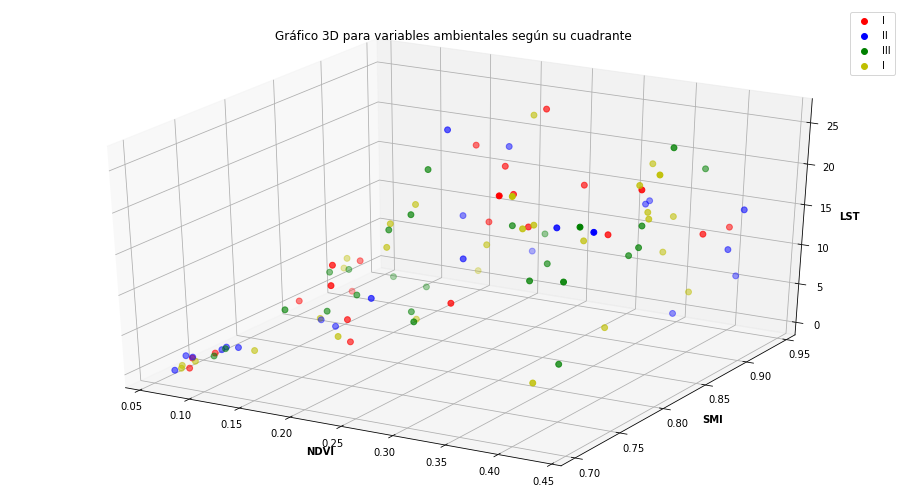

In [71]:
##P22 Haga un gráfico 3D para las 3 variables ambientales y asigne color según cuadrante
Serie_1= (df3.loc[df3["Cuadrante"]=="I"])
Serie_2= (df3.loc[df3["Cuadrante"]=="II"])
Serie_3=(df3.loc[df3["Cuadrante"]=="III"])
Serie_4=(df3.loc[df3["Cuadrante"]=="IV"])
fig = plt.figure(figsize = (16, 9))

ax = fig.add_subplot(111,projection='3d')


ax.scatter(Serie_1["NDVI"],Serie_1["SMI"],Serie_1["LST"],c='r',marker='o',s=35,label='I')
ax.scatter(Serie_2["NDVI"],Serie_2["SMI"],Serie_2["LST"],c='b',marker='o',s=35,label='II')
ax.scatter(Serie_3["NDVI"],Serie_3["SMI"],Serie_3["LST"],c='g',marker='o',s=35,label='III')
ax.scatter(Serie_4["NDVI"],Serie_4["SMI"],Serie_4["LST"],c='y',marker='o',s=35,label='I')

plt.title("Gráfico 3D para variables ambientales según su cuadrante")
ax.set_xlabel('NDVI', fontweight ='bold')
ax.set_ylabel('SMI', fontweight ='bold')
ax.set_zlabel('LST', fontweight ='bold')


ax.legend(scatterpoints=1)
plt.show()

In [72]:
## P23 Investigue como se construye una matriz de distancias entre todos las coordenadas
df_array=df1[["Long","Lat"]].to_numpy()
dist_mat=cdist(df_array,df_array,"euclidean")
df4=pd.DataFrame(dist_mat,columns=df1["Posición"],index=df1["Posición"])
print(df4)

Posición        0         1         2   ...        97        98        99
Posición                                ...                              
0         0.000000  0.051624  0.017889  ...  0.033061  0.038484  0.025318
1         0.051624  0.000000  0.033838  ...  0.046390  0.014213  0.029833
2         0.017889  0.033838  0.000000  ...  0.030806  0.020616  0.009849
3         0.044045  0.017464  0.028636  ...  0.030017  0.019313  0.030150
4         0.036125  0.047854  0.033838  ...  0.003162  0.042942  0.042521
...            ...       ...       ...  ...       ...       ...       ...
95        0.034785  0.019416  0.017263  ...  0.041340  0.005385  0.010630
96        0.040162  0.032894  0.030150  ...  0.015811  0.031113  0.036056
97        0.033061  0.046390  0.030806  ...  0.000000  0.040719  0.039623
98        0.038484  0.014213  0.020616  ...  0.040719  0.000000  0.015620
99        0.025318  0.029833  0.009849  ...  0.039623  0.015620  0.000000

[100 rows x 100 columns]


(5.560350000000007, -73.27514999999987)


<function matplotlib.pyplot.show>

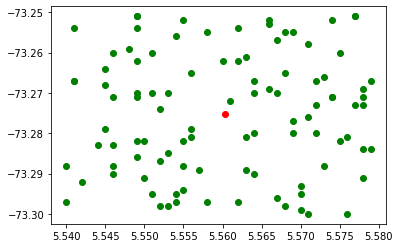

In [73]:
## P24 Ubique el centroide de toda la nube de puntos de coordenadas y seleccione solo puntos en una ventana de radio a lo sumo igual a 2/3 de la máxima distancia en la matriz de distancias
def Centroid(dist_mat):
  length=df_array.shape[0]
  sum_x=np.sum(df_array[:,0])
  sum_y=np.sum(df_array[:,1])
  return sum_x/length,sum_y/length
centroide= Centroid(np.array(dist_mat))
print(centroide)

plt.plot(df1['Long'],df1['Lat'],"go")
plt.scatter(centroide[0],centroide[1],c="r")
plt.show

In [74]:
func = []
for i in range(100):
  func.append(max(dist_mat[i]))
max(func)
radius=max(func)*2/3
print(radius)

0.039355925715173774


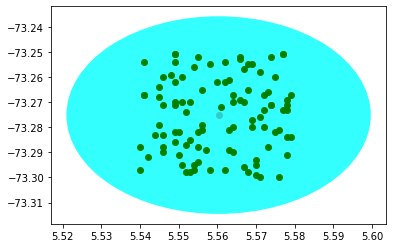

In [77]:
## P25 Calcule estadísticas descriptivas en esta ventana circular (dibuje la ventana) y asigne un color diferente a los puntos dentro de esta ventana.
fig, ax = plt.subplots()
ax.plot(df1["Long"], df1["Lat"], "go")
plt.scatter(centroide[0], centroide[1], c="r")
circle = plt.Circle((centroide[0], centroide[1]),radius, alpha=0.8, fc='aqua')
ax.add_patch(circle)

In [78]:
## P26 Suponga que queremos hacer un análisis de varianza para comparar la media de SMI por cuadrante. Se pide primero tomar aleatoriamente 10 datos de cada cuadrante y construir
#un nuevo data.frame con todas las variables pero solo con 40 filas. Utilice el análisis de varianza (modulo pingouin si desea) para comparar el índice medio de los 4 cuadrantes.

mod=ols("SMI~ Cuadrante",
        data=df4).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)

             sum_sq    df         F   PR(>F)
Cuadrante  0.003013   3.0  0.204565  0.89301
Residual   0.471381  96.0       NaN      NaN


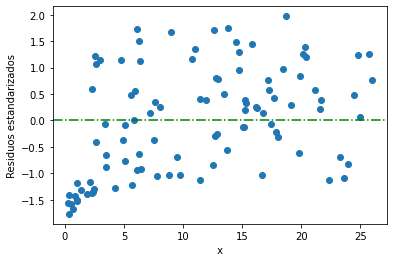

In [81]:
## P27 Use alguna librería que permita extraer los residuales del modelo y haga su histograma
influencia = mod.get_influence ()

#obtener residuos estandarizados 
standardized_residuals = influencia. resid_studentized_internal

#display impresión de residuos
(standardized_residuals)

plt.scatter(df1["LST"], standardized_residuals)
plt. xlabel (' x ')
plt. ylabel (' Residuos estandarizados ')
plt.axhline(y = 0, color = 'green', linestyle = '-.')
plt.show()



De los resultados obtenidos se puede observar que ninguno de los residuales estandarizados. Por lo tanto, ninguna de las observaciones parece ser un valor atípico.

In [82]:
##P28 Utilice la prueba de Shapiro para probar normalidad en los residuales
stat,p =shapiro(standardized_residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p>alpha:
	print('No se rechaza H0, hay normalidad en los residuales)')
else:
	print('Se rechaza H0, no hay normalidad en los residuales)')

Statistics=0.958, p=0.003
Se rechaza H0, no hay normalidad en los residuales)


In [86]:
## P29 Utilice la prueba de Levine para probar igualdad de varianzas de los residuales
res= stat()
stat.levene(standardized_residuals)
res.levene_summary

TypeError: ignored